# Lab Session I: Matrix Approximation using SVD

You can make teams of 2 persons for this lab session. (En binôme)

In this Lab session, you will learn the utilisation of SVD, especially with low rank SVD. The following libraries are necessary (not only for this session):
* Numpy: a library for matrix manipulation
* Pandas: a library for data manipulation and management
* matplotlib: a poupular library for a visulisation
* Scipy: a library for scitific math
* Scikit-learn: a popular library for machine learning

You can install the environment through package and environment management systems, such as Anaconda(https://www.anaconda.com/),
or directly use online environment, such as Google Colab (https://colab.research.google.com/)
Use Python > 3.5 for some coding featues.



## 1. Construct of SVD: Get started with matrix manipulation

To learn using python for matrix manipulation, we firstly start with a simple utilisation with analytic SVD calculating. Complete the following skeleton.

Let's start with a simple example:

In [ ]:
import numpy as np

# Given a matrix A, calculate its SVD in an analytic way.
# The skeleton given below is in the form of method. You can also do it step by step as a sequential script firstly,
# then integrate them into a method after every step returns wanted result.
# Start with a specific example:

A = np.vstack([[1,0,1],[-2,1,0]])


Get the dimension m and n of the matrix A, with attribute "shape" (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [ ]:
m, n = A.shape
m,n

(2, 3)

Construct a symmetric matric ATA by multiplying A and A transpose. Refer to the manual for linear algebra operations (https://numpy.org/doc/stable/reference/routines.linalg.html)


In [ ]:
ATA=A.dot(A.T)
ATA

array([[ 2, -2],
       [-2,  5]])

Find the eigenvalues and eigenvectors of the matrix ATA by method numpy.linalg.eig(). (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig)


In [ ]:
vals, vecs = np.linalg.eig(ATA)
vals,vecs


(array([1., 6.]),
 array([[-0.89442719,  0.4472136 ],
        [-0.4472136 , -0.89442719]]))



Reorder the eigenvalues in a decreasing way, put the values into a diagonal matrix D by multiplying with an identity matrix.
Reorder the eigenvectors corresponding to the eigenvalues, in order to compose the matrix P in the eigen decomposition of ATA

Hint 1: Use np.argsort(vals) to get the order index of each eigen value. Then, reorder the eigenvalues and eigenvectors with this index.
(This is a trivial process. Take your time with reflexion.)

Hint 2: Use np.eye(n) to generate an identity matrix with size n.

Hint 3: Use np.vstack(tup) and np.hstack(tup) to stack a tuple of arrays (tup) vertically and horizentally. See examples in https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

In [ ]:
sort_index = np.argsort(vals)[::-1]

D = np.eye(n)
D = np.diag(vals[sort_index])
# Hint: Compose the matrix P in an iterative way. This is also somewhat trivial
P= vecs[:,sort_index]
V = P.copy()
D, P, V


(array([[6., 0.],
        [0., 1.]]),
 array([[ 0.4472136 , -0.89442719],
        [-0.89442719, -0.4472136 ]]),
 array([[ 0.4472136 , -0.89442719],
        [-0.89442719, -0.4472136 ]]))

Construct Matrix Sigma from the square root of D, with padded 0's to match shape of A. You can use np.vstack() or np.hstack() to pad the matrix

In [ ]:
Sigma = np.sqrt(D)
if m > n:
    zeros_padding = np.zeros((m - n, n))
    Sigma = np.vstack([Sigma, zeros_padding])
else:
    zeros_padding = np.zeros((m, n - m))
    Sigma = np.hstack([Sigma, zeros_padding])

print(Sigma)

[[2.44948974 0.         0.        ]
 [0.         1.         0.        ]]


Now you have matrix V, which is equivalent to P transpose. You have matrix

Sigma. There is only matrix U left to calculate.

(You can do that in an iterative way)

In [ ]:
eigvals_U, U = np.linalg.eigh(ATA)
sorted_indices_U = np.argsort(eigvals_U)[::-1]
U = U[:, sorted_indices_U]
U

array([[-0.4472136 , -0.89442719],
       [ 0.89442719, -0.4472136 ]])

Write your calculation in a method. Be careful, you need to adapt your method to matrix with any dimensions.

In [ ]:
def SVD_analytic(A):
    """Calculating SVD in analytic way
    Args:
        A: ndarray, matrix to be decomposed
    Returns:
        (U, Sig, VT): tuple of three ndarrays. Representing the three matrix U Sigma and V transpose in SVD.
    """
    # complete your code here
    ATA = np.dot(A.T, A)
    AAT = np.dot(A, A.T)

    eigvals_U, U = np.linalg.eigh(AAT)
    eigvals_V, V = np.linalg.eigh(ATA)

    sorted_indices_U = np.argsort(eigvals_U)[::-1]
    sorted_indices_V = np.argsort(eigvals_V)[::-1]

    U = U[:, sorted_indices_U]
    V = V[:, sorted_indices_V]

    Sigma = np.sqrt(eigvals_U[sorted_indices_U])

    Sigma_matrix = np.zeros_like(A, dtype=float)
    np.fill_diagonal(Sigma_matrix, Sigma)

    return (U, Sigma, V.T)

In [ ]:
# To verify that your answer is correct. Print some simple Matrix and see the multiplication of their SVD components
A = np.vstack([[1,0,1],[-2,1,0]])
print(A)
U, S, VT = SVD_analytic(A)
print(U,S,VT)

[[ 1  0  1]
 [-2  1  0]]
[[-0.4472136  -0.89442719]
 [ 0.89442719 -0.4472136 ]] [2.44948974 1.        ] [[-0.91287093  0.36514837 -0.18257419]
 [ 0.          0.4472136   0.89442719]
 [ 0.40824829  0.81649658 -0.40824829]]


In [ ]:
# You can verify your solution with SVD implemented in Numpy, with the function np.linalg.svd()

U_, S_, V_ = np.linalg.svd(A)
print(U_, S_, V_)

# Noting that the results are usually obtained by approximation, you will not get precisely equivalent values from diffrent methods.
# To compare is two matrix A and B are approximately equivalent, use method np.allclose(A,B) (https://numpy.org/doc/stable/reference/generated/numpy.allclose.html)



[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]] [2.44948974 1.        ] [[-9.12870929e-01  3.65148372e-01 -1.82574186e-01]
 [-3.73536832e-16  4.47213595e-01  8.94427191e-01]
 [-4.08248290e-01 -8.16496581e-01  4.08248290e-01]]


Now you have some basic notions on matrix manipulation with Python. Let's do some more advanced exercises with SVD.

## 2. Data compression with truncated SVD

Images are made up by pixels, which are essentially matrix. We will see how low rank SVD compresses an image.
A colorful image is usually represented by three matrix, respectively containing the color information of Red Green and Blue (RGB).
To simplify the data processing, monochrome image with greyscale is usually applied, represented by a single matrix.

To run the programme, you should put the image file at the same directory with this notebook.
If you are using Google Colab, put the image file at the root directory of your Colab project.

In [ ]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt

# A function converting RBG to monochrone image.
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


# Load the RGB file as three matrix and convert it to monochrone greyscale image as a single matrix
img = image.imread("Mona_Lisa.jpg")
img = rgb2gray(img) # convert from rgb to monochrome, so that an image is represented by a single matrix

In [ ]:
np.max(img),np.min(img)
np.mean(img)

47.36868334565163

In [ ]:
vec_min = np.min(img)
vec_max = np.max(img)
img_vect=(img-vec_min)/(vec_max-vec_min)
np.max(img_vect),np.min(img_vect)
np.mean(img_vect)

0.22287862350978763

In [ ]:

# 1. Normalise the values in the matrix, by making every entry lie in range [0,1] (hint: the maximum value in a matrix can be found by np.max())
img = (img-vec_min)/(vec_max-vec_min)  #

# 2. Calculate the rank of the matrix img by np.linalg.matrix_rank() refer to the manual for more info.
img_rank = np.linalg.matrix_rank(img, 0.)

# 3. Run SVD on Image
U, S, V = np.linalg.svd(img)
U.shape, S.shape, V.shape

((330, 330), (246,), (246, 246))

Now we illustrate the singuler values on each rank, and the information restrained with different number of rank.
The singuler values should be sorted in a descdent way, denoted by $S$ (the output of method np.linalg.svd() is in a such form by default.)
Given a rank $r$, the information restrained $IR$ is calculated by the cumulative sum of the singular values, represented by percentage. i.e.
$$
IR_r = \sum_{i=1}^{i=r}S[i] \times 100\%
$$

In [ ]:
total_S = S.sum() # Used to calculate the percentage of cumulative sum
n_components = len(S) # The number of all possible ranks (full rank)
component_idx = range(1,  n_components + 1) # This variable is used for plotting
# 4. Implement the equation above to calculate retained information.
# info_retained should be a 1D-array with the size of n_components
# hint: use method np.cumsum() https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
info_retained=np.cumsum(S)/total_S*100
info_retained[1:10]

array([33.868142  , 39.37808908, 43.56729351, 46.56774784, 48.99441842,
       51.16159098, 53.10543821, 54.81142202, 56.41095157])

The codes below serve to illustrate the original image, singular values for each rank , as well as the cumulative percentage of information carried by singular vectors corresponding to different rank.
You don't need to implement anything, but you must understand the everyline of the code, and then give your observations and remarks in a markdown block.

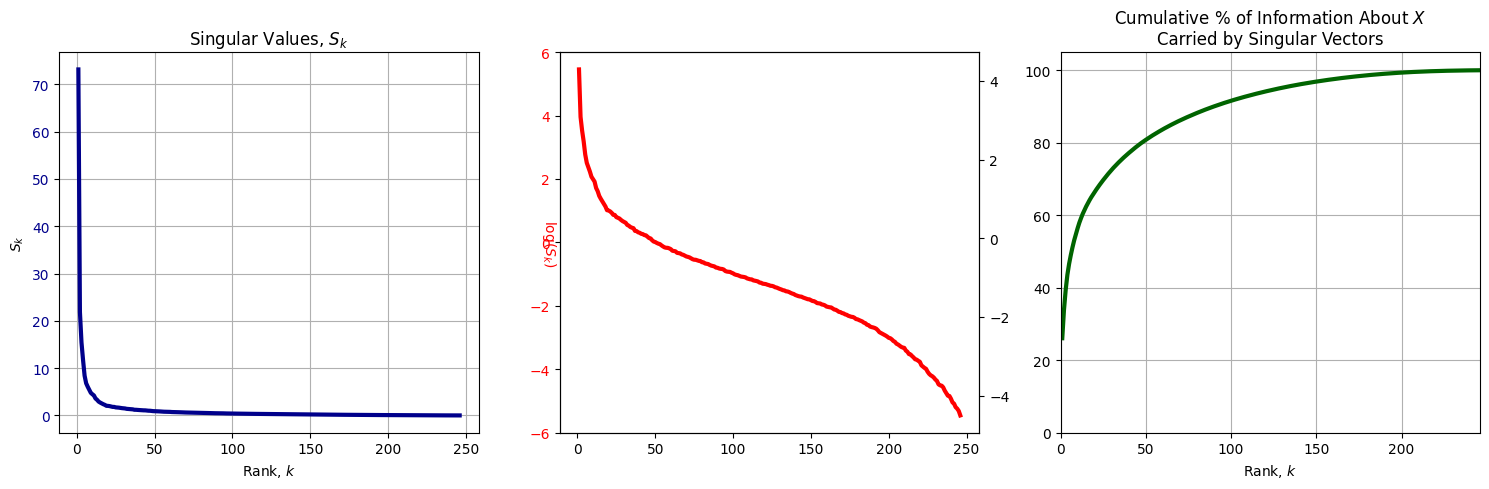

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot (index 0)
axs[0].plot(component_idx, S, label='Singular Values of $X$', color='darkblue', linewidth=3)
axs[0].grid()
axs[0].set_xlabel("Rank, $k$")
axs[0].set_ylabel('$S_k$')
axs[0].tick_params(axis='y', labelcolor='darkblue')
axs[0].set_title('Singular Values, $S_k$')


# Plot on the second subplot (index 1)
twax = axs[1].twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
axs[1].set_ylabel('$\log(S_k)$\n', color='red', rotation=270)
axs[1].tick_params(axis='y', labelcolor='red')
axs[1].set_ylim([-6, 6])

#Plot on the third subplot (index 2)
axs[2].plot(component_idx, info_retained, color='darkgreen', linewidth=3)
axs[2].set_xlim(0, n_components)
axs[2].set_ylim([0, 105])
axs[2].set_xlabel("Rank, $k$")
axs[2].grid()
axs[2].set_title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

### Your observation and remarks: (double click this block to modify)

We can see that there is a big drop off in singular values its become near 0 after the first rank
concernign the log we can see that this is the same pattern but its smoother so we can really see how singular values decreases
we can also see that all the values are used


Illustrate the compressed image, with selected ranks varying from 1 to 500 (for example, you can take ranks equaling to 1, 5, 10, 100, 200, 300)
The constructed image is still calculated by multiplying U S and V (transpose), but with rank number limited.


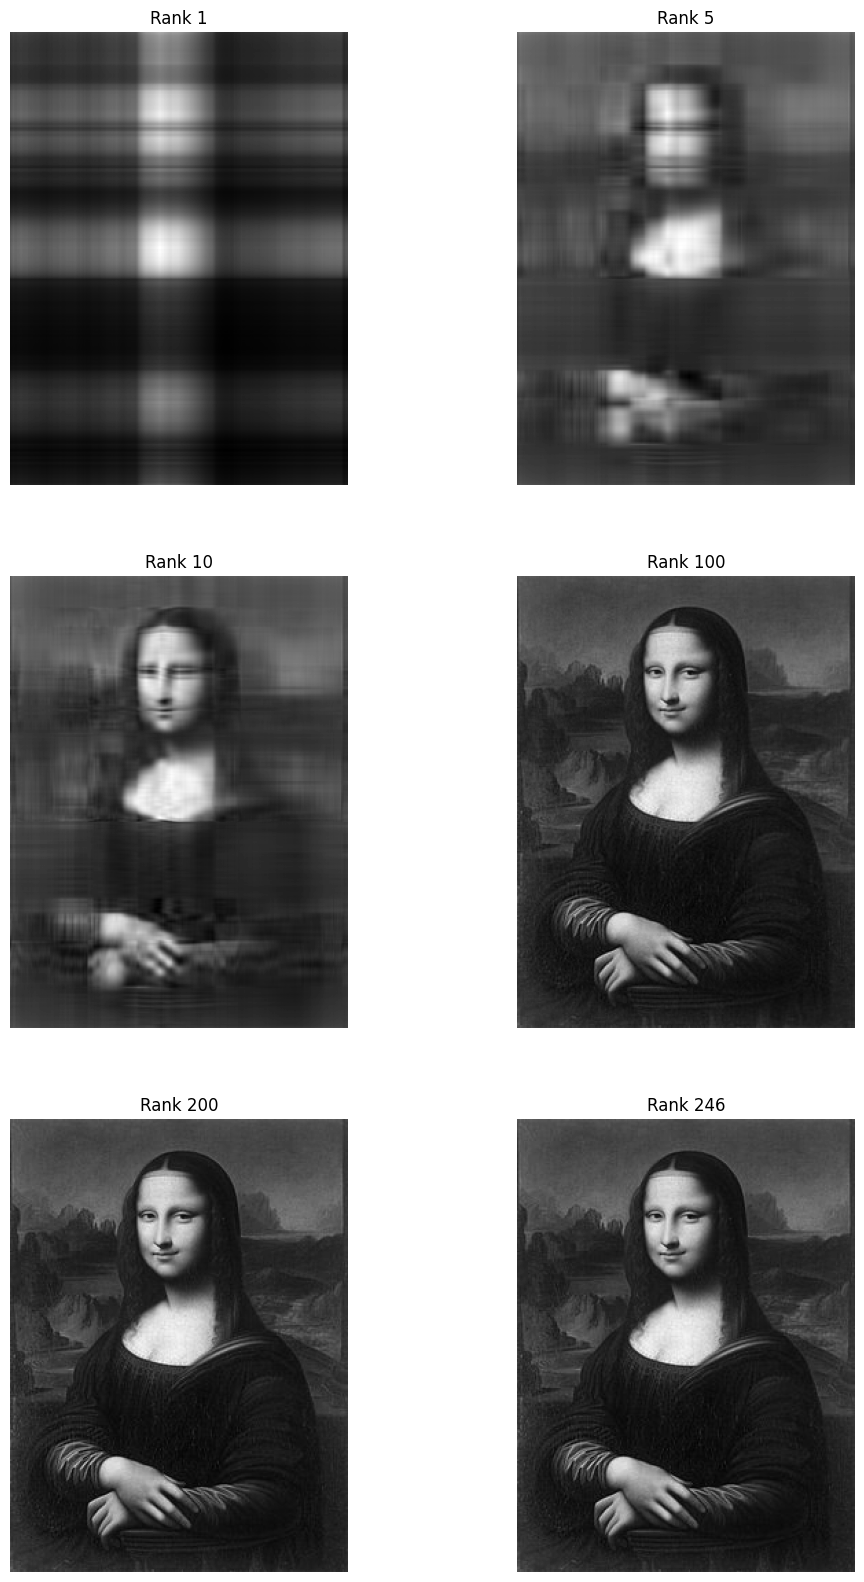

In [ ]:
plt.figure(figsize=(12, 20))

for i, rank in enumerate([1, 5, 10, 100, 200,246]): #j'ai supprimé le rank 300 car la dimensioon de V est de 246

    # 5. Construct the image by low rank SVD components, with rank value given
    img_compressed = U[:, :rank] @ np.diag(S[:rank]) @ V[:rank, :]

    # Plot the image
    plt.subplot(3, 2, i + 1)
    plt.title(f"Rank {rank}")
    plt.imshow(img_compressed, cmap="gray")
    plt.axis("off")

You may find that the quality of the compressed image is acceptable with a relatively low rank. This phenomenon is consistent with the plot of cumulative of information with low rank.
Now, calculate the compression rate with a given rank.

The compression rate is simply calculated by the whole size of matrix stored (U,S,V) divesed by the size of the matrix representing the original image

In [ ]:
# 6. Write your method of compressing_rate(A, r), then calculate the compression rate with the rank selected above.
def compressing_rate(A, r):
    """
    Calculate the compressing rate of matrix A by SVD with rank limited to r.

    Args:
        A: ndarray, the original matrix
        r: integer, the value of rank
    Returns:
        cr: compressing_rate
    """
    #lets get usv back
    U, S, V = np.linalg.svd(A)
    m,n= U.shape
    size=m*n+r+r*r
    og_size=m*n
    cr=(size/og_size)
    return cr

In [ ]:
cr=compressing_rate(img,100)
cr

1.0927456382001837